In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [197]:
train_data = pd.read_excel('Data_Train.xlsx')

In [198]:
test_data = pd.read_excel('Test_set.xlsx')

In [199]:
df = train_data.append(test_data)

In [200]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [201]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [202]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [203]:
df['Arr_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [204]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0 stop')

In [205]:
df['Total_Stops'] = df['Total_Stops'].fillna('0 stop')

In [206]:
df['Tot_Stops'] = df['Total_Stops'].str.split(' ').str[0]
df['Tot_Stops'] = df['Tot_Stops'].astype(int)

In [207]:
df['Arrival_Hour'] = df['Arr_Time'].str.split(':').str[0]
df['Arrival_Minutes'] = df['Arr_Time'].str.split(':').str[1]
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minutes'] = df['Arrival_Minutes'].astype(int)

In [208]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Minutes'] = df['Dep_Time'].str.split(':').str[1]
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Minutes'] = df['Dep_Minutes'].astype(int)

In [209]:
df['Route_1'] = df['Route'].str.split('→ ').str[0]
df['Route_2'] = df['Route'].str.split('→ ').str[1]
df['Route_3'] = df['Route'].str.split('→ ').str[2]
df['Route_4'] = df['Route'].str.split('→ ').str[3]
df['Route_5'] = df['Route'].str.split('→ ').str[4]

In [210]:
df['Route_1'] = df['Route_1'].fillna('None')
df['Route_2'] = df['Route_2'].fillna('None')
df['Route_3'] = df['Route_3'].fillna('None')
df['Route_4'] = df['Route_4'].fillna('None')
df['Route_5'] = df['Route_5'].fillna('None')

In [211]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [212]:
feat_to_drop = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Arr_Time']
df = df.drop(feat_to_drop, axis = 1)

In [213]:
df['Price'] = df['Price'].astype(int)

In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
encoder = LabelEncoder()

In [216]:
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])
df['Route_1'] = encoder.fit_transform(df['Route_1'])
df['Route_2'] = encoder.fit_transform(df['Route_2'])
df['Route_3'] = encoder.fit_transform(df['Route_3'])
df['Route_4'] = encoder.fit_transform(df['Route_4'])
df['Route_5'] = encoder.fit_transform(df['Route_5'])

#### Feature Selection

In [217]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [218]:
X = df.copy()

In [219]:
X = X.drop(['Price'], axis = 1)

In [220]:
y = df['Price']

In [245]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

(4007, 17)

In [222]:
model_select = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
model_select.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [223]:
model_select.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [246]:
X_train = X_train.drop(['Year'], axis = 1)
X_test = X_test.drop(['Year'], axis = 1)

#### Random Forest classifier

In [247]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [248]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [249]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [250]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 2, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [251]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [252]:
y_pred=rf_random.predict(X_test)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

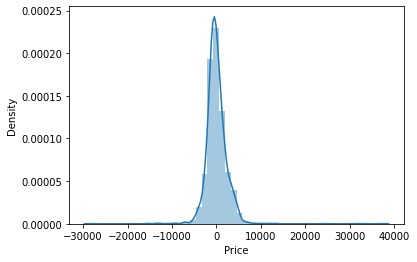

In [253]:
import seaborn as sns

sns.distplot(y_test-y_pred)

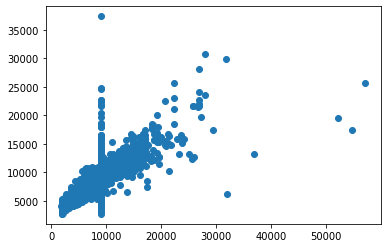

In [254]:
plt.scatter(y_test,y_pred)

In [256]:
rf_random.score(X_train,y_train)

-3722713.9553435156

In [257]:
rf_random.score(X_test,y_test)

-5944484.620653421

In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [259]:
mean_squared_error(y_test,y_pred)

5944484.620653421

In [260]:
mean_absolute_error(y_test,y_pred)

1581.1705247783318